In [1]:
from functools import reduce
from pandas.plotting import register_matplotlib_converters
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

register_matplotlib_converters()

%matplotlib inline

## Utilitários

In [2]:
def scatter_beta(dataframe, x_key, y_key):
    x = dataframe[x_key].pct_change().dropna()
    y = dataframe[y_key].pct_change().dropna()
    slope, intercept, _, _, _ = stats.linregress(x, y)
    
#     fig.add_trace(go.Scatter(name=f'Beta = {slope:.3}', x=x, y=x*slope + intercept, mode='lines'))

    plt.figure(figsize=(12, 6))
    plt.title(f'{x_key} vs {y_key}')
    plt.scatter(x, y, color="blue")
    plt.xlabel(x_key)
    plt.ylabel(y_key)
    plt.plot(x, list(map(lambda i : i*slope + intercept, x)), label=f'Beta = {slope:.3}', color="red")
    plt.legend(loc=(1.01, 0.05))
    plt.show()


def get_history(ticker, period="1y"):
    ticker = yf.Ticker(ticker)
    return ticker.history(period=period)[["Close"]]

## Carrega bases históricas

+ `^BVSP`: Índice Bovespa
+ `SPY`: ETF que replica o S&P500

In [3]:
dataframe = []
tickers = ["SPY", "^BVSP", "PRIO3.SA", "ITUB4.SA", "GOLL4.SA", "SLCE3.SA", "VALE3.SA"]
for ticker in tickers:
    serie = get_history(ticker)#.values
    serie.columns = [ticker]
    dataframe.append(serie)
    
dataframe = reduce(lambda left, right : left.join(right) , dataframe)
dataframe = dataframe.ffill().bfill()
dataframe.tail()

,SPY,^BVSP,PRIO3.SA,ITUB4.SA,GOLL4.SA,SLCE3.SA,VALE3.SA
Date,,,,,,,
2020-04-29,293.21,83171.00,21.51,23.64,13.34,24.53,46.73
2020-04-30,290.48,80506.00,20.45,22.76,12.40,24.00,44.86
2020-05-01,282.79,80506.00,20.45,22.76,12.40,24.00,44.86
2020-05-04,283.59,78876.22,19.73,22.76,11.15,25.05,43.93
2020-05-04,283.59,78876.22,19.73,21.89,11.15,25.05,43.93


## Normalização dos preços

In [4]:
norm_df = (dataframe / dataframe.iloc[0])
norm_df.tail()

,SPY,^BVSP,PRIO3.SA,ITUB4.SA,GOLL4.SA,SLCE3.SA,VALE3.SA
Date,,,,,,,
2020-04-29,1.021780,0.875401,1.232665,0.743864,0.572532,1.228958,0.965895
2020-04-30,1.012267,0.847351,1.171920,0.716174,0.532189,1.202405,0.927243
2020-05-01,0.985468,0.847351,1.171920,0.716174,0.532189,1.202405,0.927243
2020-05-04,0.988256,0.830197,1.130659,0.716174,0.478541,1.255010,0.908020
2020-05-04,0.988256,0.830197,1.130659,0.688798,0.478541,1.255010,0.908020


## Séries Históricas

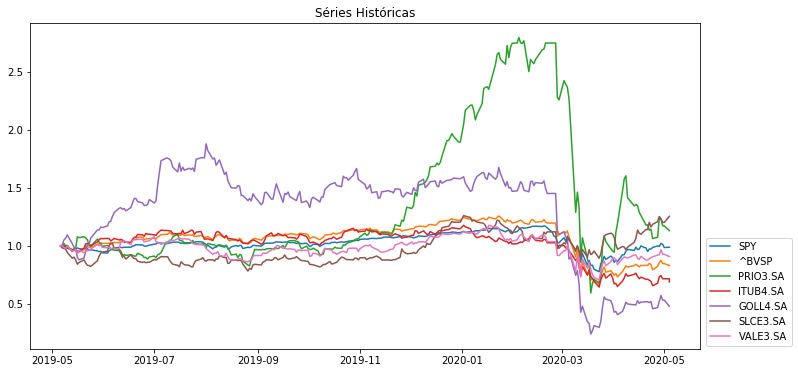

In [5]:
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(norm_df[ticker], label=ticker)
plt.legend(loc=(1.01, 0.01))
plt.title("Séries Históricas")
plt.show()

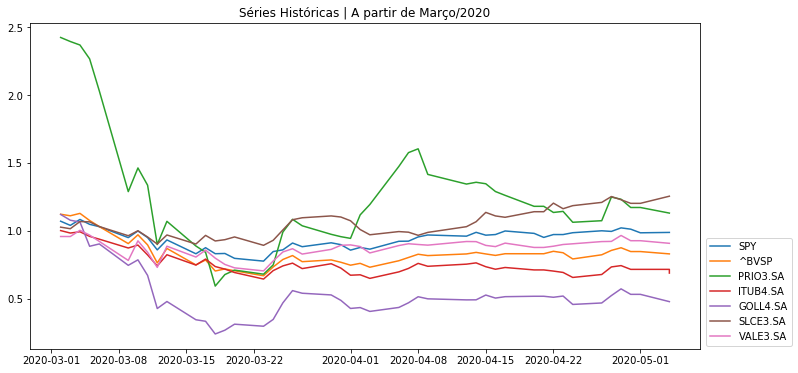

In [6]:
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(norm_df[ticker]["2020-03":], label=ticker)
plt.legend(loc=(1.01, 0.01))
plt.title("Séries Históricas | A partir de Março/2020")
plt.show()

## Matriz de Correlação

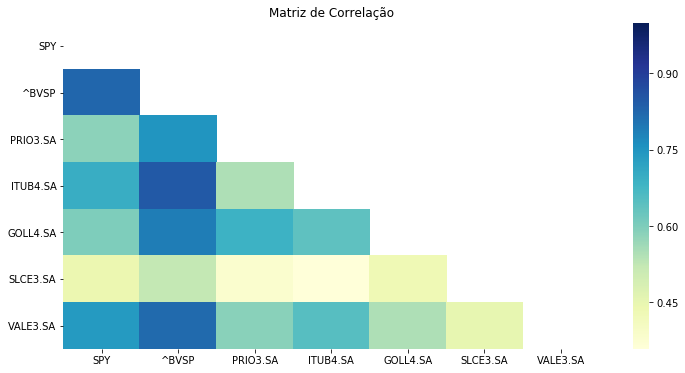

In [7]:
corr = dataframe.pct_change().corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Matriz de Correlação")
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="YlGnBu")
plt.show()

## Gráfico de Dispersão e Cálculo do Beta $\beta$

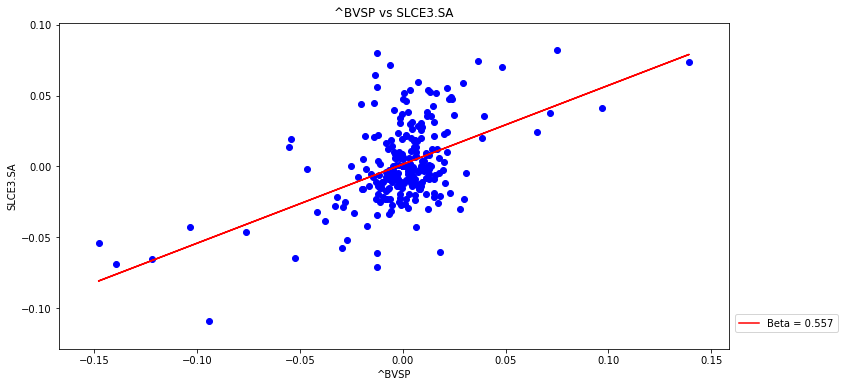

In [8]:
scatter_beta(dataframe, "^BVSP", "SLCE3.SA")

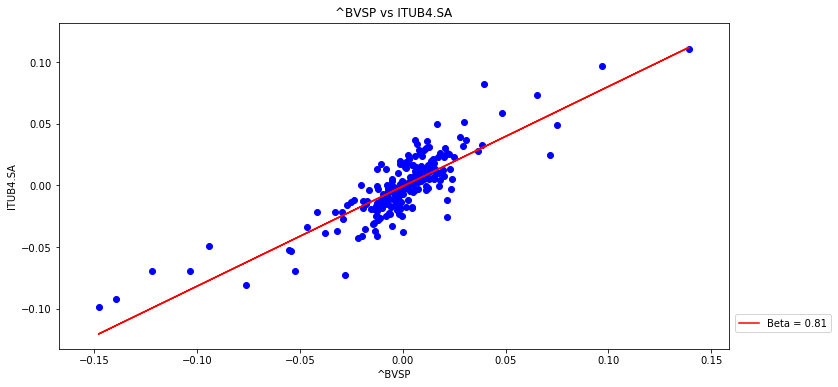

In [9]:
scatter_beta(dataframe, "^BVSP", "ITUB4.SA")

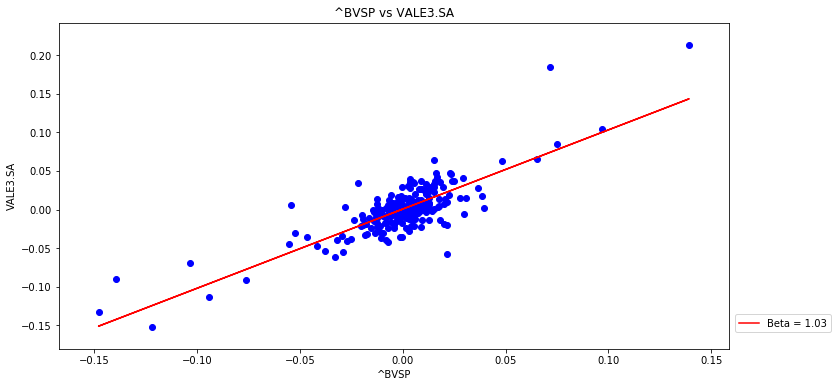

In [10]:
scatter_beta(dataframe, "^BVSP", "VALE3.SA")